In [108]:
import os
import re
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json

base_path = '/Users/c/Desktop/project/decentral_online_voting_20210109/stated/analysis/verifications/'

In [109]:
df = pd.read_csv(base_path + 'sp500_companies.csv')  

In [110]:
df

,skip,name,CIK,location_untrusted_source,name_worker_1,name_worker_2,worker_agreement_exact,worker agreement,domain_worker_1,domain_worker_2,...,matching_year,matching_cik,source_worker_2,matching_year.1,matching_cik.1,worker_agreement_exact.7,worker agreement.7,source,source_serial_number,confidence
0,NaN,3M COMPANY,66740,"Saint Paul, Minnesota",3M COMPANY,3M COMPANY,1,1,3m.com,3m.com,...,69,41,https://www.sec.gov/Archives/edgar/data/66740/...,69,41,1,1,https://www.sec.gov/Archives/edgar/data/66740/...,NaN,0.9
1,NaN,A. O. Smith Corporation,91142,"Milwaukee, Wisconsin",A. O. Smith Corporation,A. O. Smith Corporation,1,1,aosmith.com,aosmith.com,...,77,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,77,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9
2,NaN,Abbott Laboratories,1800,"North Chicago, Illinois",Abbott Laboratories,Abbott Laboratories,1,1,abbottinvestor.com>abbott.com,abbottinvestor.com>abbott.com,...,82,55,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,82,55,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9
3,NaN,AbbVie Inc.,1551152,"North Chicago, Illinois",AbbVie Inc.,AbbVie Inc.,1,1,abbvie.com,abbvie.com,...,80,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,80,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9
4,already verified,Accenture plc,1467373,"Dublin, Ireland",Accenture plc,Accenture plc,1,1,accenture.com,accenture.com,...,79,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,79,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,https://core.cro.ie/e-commerce/company/search/...,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,NaN,"YUM! BRANDS, INC.",1041061,"Louisville, Kentucky","YUM! BRANDS, INC.","YUM! BRANDS, INC.",1,1,yum.com,yum.com,...,79,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,79,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9
499,NaN,Zebra Technologies Corporation,877212,"Lincolnshire, Illinois",Zebra Technologies Corporation,Zebra Technologies Corporation,1,1,NaN,zebra.com,...,79,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,79,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9
500,NaN,"ZIMMER BIOMET HOLDINGS, INC.",1136869,"Warsaw, Indiana","ZIMMER BIOMET HOLDINGS, INC.","ZIMMER BIOMET HOLDINGS, INC.",1,1,NaN,zimmerbiomet.com,...,79,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,79,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9
501,NaN,"ZIONS BANCORPORATION, NATIONAL ASSOCIATION",109380,"Salt Lake City, Utah","ZIONS BANCORPORATION, NATIONAL ASSOCIATION","ZIONS BANCORPORATION, NATIONAL ASSOCIATION",1,1,NaN,zionsbancorporation.com,...,80,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,80,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9


In [254]:
from textdistance import levenshtein
from difflib import SequenceMatcher


In [132]:
df['lv'] = df.apply(lambda x: levenshtein.distance(
    str(x['name_worker_1']).lower(),
    str(x['name_worker_2']).lower()) / 
                    max(len(str(x['name_worker_1'])), 
                        len(str(x['name_worker_2'])) ), axis=1)
df.sort_values(by='lv', ascending=True)

,skip,name,CIK,location_untrusted_source,name_worker_1,name_worker_2,worker_agreement_exact,worker agreement,domain_worker_1,domain_worker_2,...,matching_cik,source_worker_2,matching_year.1,matching_cik.1,worker_agreement_exact.7,worker agreement.7,source,source_serial_number,confidence,lv
0,NaN,3M COMPANY,66740,"Saint Paul, Minnesota",3M COMPANY,3M COMPANY,1,1,3m.com,3m.com,...,41,https://www.sec.gov/Archives/edgar/data/66740/...,69,41,1,1,https://www.sec.gov/Archives/edgar/data/66740/...,NaN,0.9,0.000000
331,NaN,MSCI INC.,1408198,"New York City, New York",MSCI INC.,MSCI INC.,1,1,msci.com,msci.com,...,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,80,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,0.000000
330,NaN,"MOTOROLA SOLUTIONS, INC.",68505,"Chicago, Illinois","MOTOROLA SOLUTIONS, INC.","MOTOROLA SOLUTIONS, INC.",1,1,motorolasolutions.com,motorolasolutions.com,...,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,77,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,0.000000
329,NaN,The Mosaic Company,1285785,"Tampa, Florida",The Mosaic Company,The Mosaic Company,1,1,mosaicco.com,mosaicco.com,...,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,79,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,0.000000
328,NaN,Morgan Stanley,895421,"New York City, New York",MORGAN STANLEY,Morgan Stanley,0,1,morganstanley.com,morganstanley.com,...,53,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,81,53,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,NaN,MICROCHIP TECHNOLOGY INCORPORATED,827054,"Chandler, Arizona",NaN,MICROCHIP TECHNOLOGY INCORPORATED,0,0,NaN,microchip.com,...,#VALUE!,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,83,53,0,0,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,0.939394
442,NaN,TELEDYNE TECHNOLOGIES INCORPORATED,1094285,"Thousand Oaks, California",NaN,TELEDYNE TECHNOLOGIES INCORPORATED,0,0,NaN,teledyne.com,...,#VALUE!,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,82,52,0,0,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,0.941176
408,NaN,"Ross Stores, Inc.",745732,"Dublin, California",NaN,"Ross Stores, Inc.",0,0,NaN,rossstores.com,...,#VALUE!,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,83,53,0,0,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,0.941176
281,NaN,THE KROGER CO.,56873,"Cincinnati, Ohio",NaN,THE KROGER CO.,0,0,NaN,thekrogerco.com,...,#VALUE!,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,81,54,0,0,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,1.000000


<Axes: >

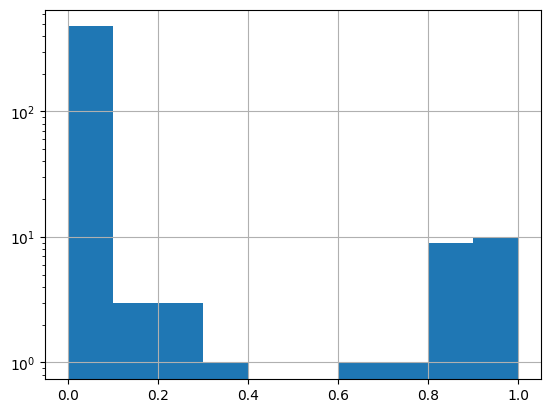

In [113]:
df.lv.hist(bins=10, log=True)

In [114]:
df[(df.lv > 0) & (df.lv < 0.4)]

,skip,name,CIK,location_untrusted_source,name_worker_1,name_worker_2,worker_agreement_exact,worker agreement,domain_worker_1,domain_worker_2,...,matching_cik,source_worker_2,matching_year.1,matching_cik.1,worker_agreement_exact.7,worker agreement.7,source,source_serial_number,confidence,lv
6,NaN,ARCHER-DANIELS-MIDLAND COMPANY,7084,"Chicago, Illinois",Archer-Daniels-Midland Co,ARCHER-DANIELS-MIDLAND COMPANY,0,0,adm.com,adm.com,...,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,76,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,0.166667
7,NaN,ADOBE INC.,796343,"San Jose, California",Adobe Inc,ADOBE INC.,0,0,adobe.com,adobe.com,...,53,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,79,49,0,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,0.100000
8,NaN,"AUTOMATIC DATA PROCESSING, INC.",8670,"Roseland, New Jersey","Automatic Data Processing, Inc","AUTOMATIC DATA PROCESSING, INC.",0,0,adp.com,adp.com,...,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,76,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,0.032258
9,NaN,"ADVANCE AUTO PARTS, INC.",1158449,"Raleigh, North Carolina",ADVANCE AUTO PARTS INC,"ADVANCE AUTO PARTS, INC.",0,0,advanceautoparts.com,AdvanceAutoParts.com,...,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,79,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,0.083333
52,NaN,Atmos Energy Corporation,731802,"Dallas, Texas",Atmos Energy Corp,Atmos Energy Corporation,0,0,atmosenergy.com,atmosenergy.com,...,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,78,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,0.291667
54,NaN,"AUTOZONE, INC.",866787,"Memphis, Tennessee","AUTOZONE, INC","AUTOZONE, INC.",0,0,autozone.com,autozone.com,...,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,78,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,0.071429
95,NaN,"Cboe Global Markets, Inc.",1374310,"Chicago, Illinois","Cboe Global Markets, Inc.","Cboe Global Markets, Inc",0,0,cboe.com,cboe.com,...,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,80,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,0.040000
115,NaN,"Citizens Financial Group, Inc.",759944,"Providence, Rhode Island",CITIZENS FINANCIAL GROUP INC,"Citizens Financial Group, Inc.",0,0,citizensbank.com,citizensbank.com,...,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,78,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,0.066667
119,NaN,The Coca-Cola Company,21344,"Atlanta, Georgia",COCA COLA CO,Coca-Cola,0,0,coca-colacompany.com,coca-colacompany.com,...,49,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,76,49,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,0.333333
154,NaN,"DOLLAR TREE, INC.",935703,"Chesapeake, Virginia","DOLLAR TREE, INC.","DOLLAR TREE, INC",0,0,dollartree.com,dollartree.com,...,53,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,83,53,1,1,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,NaN,0.9,0.058824


In [201]:
from collections import Counter

words = []
for name in df.name:
    words.extend(name.lower().split(' '))
    
counts = Counter(words)

result = []
d = dict(counts)
for key in d:
    result.append({'word': key, 'cnt': d[key]})

df5 = pd.DataFrame(result)
df5['frequency'] = df5.cnt / len(df)
df5.sort_values(by='cnt', ascending=False).head(30)

,word,cnt,frequency
9,inc.,267,0.530815
5,corporation,121,0.240557
1,company,43,0.085487
22,the,28,0.055666
25,incorporated,18,0.035785
90,&,17,0.033797
34,"group,",16,0.031809
46,energy,13,0.025845
63,international,13,0.025845
142,financial,11,0.021869


In [284]:
def lower_and_remove_common(s):
    return (
        str(s).lower().replace('inc.', '')
        .replace('corporation', '').replace('company', '').replace('companies', '')
        .replace('the ', '').replace('incorporated','')
        .replace('limited','').replace('ltd.','')
        .replace('co.','')
        .replace('technologies','').replace('technology','').replace('international','').replace('dynamics', '')
        .replace('energy','').replace('group','')
        .replace('american','').replace('financial','')
        .replace('holdings','').replace(',','')
        .replace('laboratories','').replace('industries','')
        .replace('property','').replace('properties', '')
        .replace('trust', '')
        .replace('pharmaceuticals','').replace('communications', '')
        .replace('healthcare', '')
        .replace('capital', '')
        .replace('resorts', '')
        .replace('entertainment', '')
        .replace('solutions', '')
        .replace('services', '')
        .replace('materials', '')
        .replace('networks', '').replace('systems', '').replace('digital', '')
        .replace('global', '').replace('worldwide', '')
           )
df['name_processed'] = df.name.apply(lambda x: lower_and_remove_common(x))

In [285]:
def normalized_levenshtein (a,b):
    return levenshtein.distance(a, b) / ((len(a) + len(b)) / 2)

In [286]:
def longest_common_substring (a,b):
    match = SequenceMatcher(None, a, b).find_longest_match()
    return match.size / ((len(a) + len(b)) / 2)

In [307]:
result = []
_df = df
for i,a in df.iterrows():
    if(i%50 == 0):
        print(i)
    for j,b in _df.iterrows():
        #print(i,j)
        if str(a) > str(b):
            continue
        if len(a) < 3 or len(b) < 3:
            continue
        if (a['serial_number'] == b['serial_number']):
            if (a['country'] == b['country']):
                continue
        result.append([a['name_processed'],b['name_processed'],
                       normalized_levenshtein(a['name_processed'],b['name_processed']),
                       longest_common_substring(a['name_processed'],b['name_processed'])])

0
50
100
150
200
250
300
350
400
450
500


In [309]:
df2 = pd.DataFrame(result).rename(columns={0:'a', 1:'b', 2:'normalized_levenshtein', 3: 'longest_common_substring'})

<Axes: >

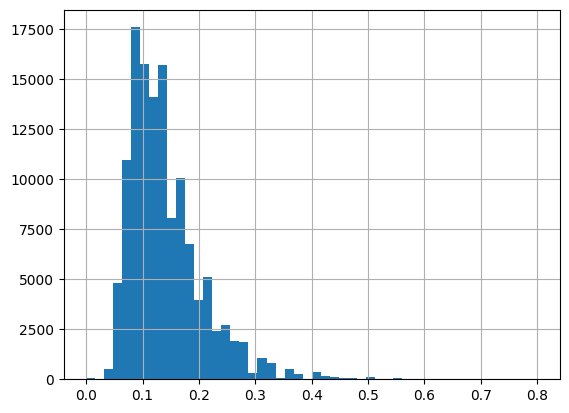

In [310]:
df2.longest_common_substring.hist(bins=50)

<Axes: >

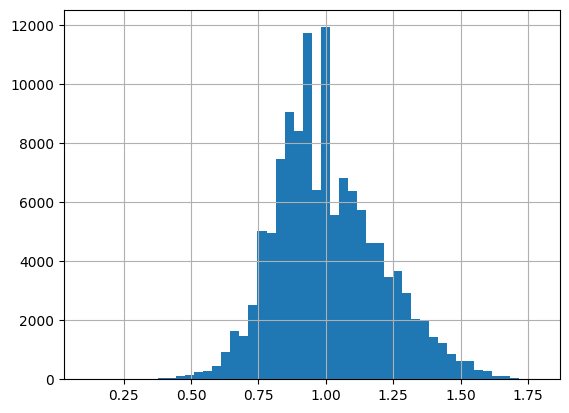

In [311]:
df2.normalized_levenshtein.hist(bins=50)

In [312]:
pd.set_option('display.max_rows', 40)

df2[df2.normalized_levenshtein < 0.3].sort_values(by='normalized_levenshtein')

,a,b,normalized_levenshtein,longest_common_substring
57099,generac,general,0.111111,0.666667
28571,cme,cms,0.200000,0.400000
56769,gen,ge,0.200000,0.400000
54198,fortinet,fortive,0.235294,0.588235
46008,equifax,equinix,0.250000,0.500000
48177,evergy,entergy,0.266667,0.666667
103134,roper,cooper,0.266667,0.800000
57702,general mills,general motors,0.275862,0.620690
7060,ametek,ameren,0.285714,0.428571
117705,ventas,cintas,0.285714,0.714286


In [313]:
pd.set_option('display.max_rows', 50)

df2[df2.longest_common_substring > 0.6].sort_values(by='longest_common_substring')

,a,b,normalized_levenshtein,longest_common_substring
100969,realty income,realty,0.608696,0.608696
126120,zoetis,otis,0.461538,0.615385
7561,amgen,biogen,0.461538,0.615385
124707,xcel,steel,0.461538,0.615385
14698,bank of america,laboratory of america,0.461538,0.615385
109566,sysco,cisco,0.461538,0.615385
121950,wec,pnc,0.461538,0.615385
77209,masco,cisco,0.461538,0.615385
125485,yum! brands,newell brands,0.461538,0.615385
57447,general electric,general,0.615385,0.615385


<Axes: xlabel='normalized_levenshtein', ylabel='longest_common_substring'>

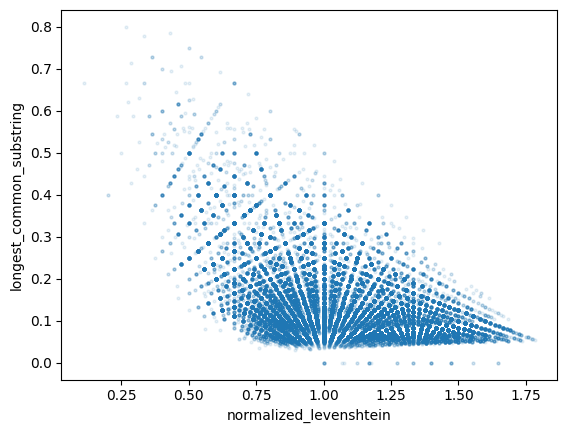

In [314]:
df2.plot.scatter(x='normalized_levenshtein', y='longest_common_substring', s=4, alpha=0.1)

In [315]:
pd.set_option('display.max_rows', 80)

df2[(df2.normalized_levenshtein<0.45) & (df2.longest_common_substring> 0.6)].drop_duplicates()


,a,b,normalized_levenshtein,longest_common_substring
6253,airlines,united airlines,0.428571,0.785714
31098,constellation brands,constellation,0.333333,0.777778
48177,evergy,entergy,0.266667,0.666667
57099,generac,general,0.111111,0.666667
57700,general mills,general,0.434783,0.695652
57702,general mills,general motors,0.275862,0.620690
64436,idex,fedex,0.363636,0.727273
64472,idex,idexx,0.333333,0.666667
77436,masco,sysco,0.333333,0.666667
85588,news,loews,0.363636,0.727273


In [316]:
# large international companies with holding strucures spanning multiple jurisdiction may cause inconsistencies
# need to take ownership into account